In [1]:
import os
import glob
from matplotlib import pyplot as plt
import re
import numpy as np

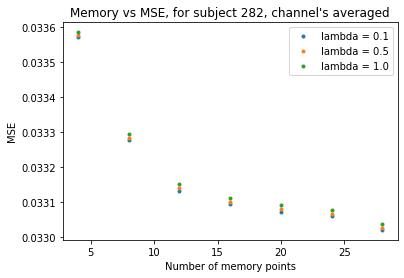

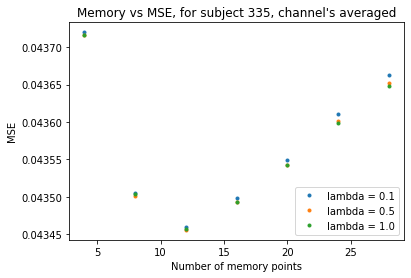

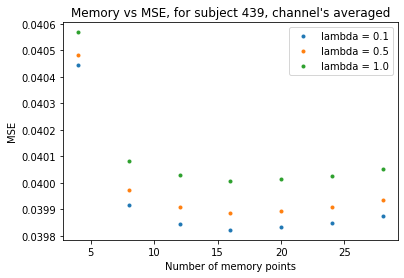

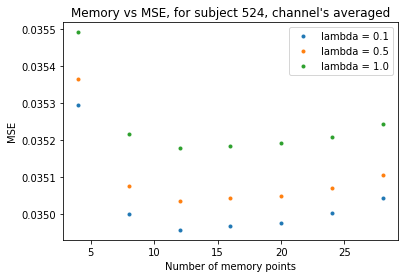

In [6]:
path = r'C:\Users\parkf\Desktop\summer2021\htcChNorm'

subjectList = []
ridgeVec = []
memVec = []
foldVec = []
channelDict = {}

for filename in glob.glob(os.path.join(path, '*.out')):
    parseThis = os.path.basename(filename)
    fileNum, parseThis = re.split('L|R|B', parseThis)
    memNum, parseThis = re.split('r', parseThis)
    memNum = re.split('p', memNum)[1]
    ridgeNum, parseThis = re.split('c', parseThis)
    foldNum = re.split('.o', parseThis)[0]
    if int(fileNum) not in subjectList:
        subjectList.append(int(fileNum))
        f = open(filename, "r")
        hold = f.read()
        channelDict[subjectList.index(int(fileNum))] = len(re.split(',', hold)) - 1
    if int(memNum) not in memVec:
        memVec.append(int(memNum))
    if float(ridgeNum) not in ridgeVec:
        ridgeVec.append(float(ridgeNum))
    if int(foldNum) not in foldVec:
        foldVec.append(int(foldNum))

for subject in range(len(subjectList)):
    err = np.zeros((len(ridgeVec), len(memVec), channelDict[subject], len(foldVec)))
    for filename in glob.glob(os.path.join(path, '*.out')):
        parseThis = os.path.basename(filename)
        fileNum, parseThis = re.split('L|R|B', parseThis)
        if int(fileNum) != subjectList[subject]:
            continue
        memNum, parseThis = re.split('r', parseThis)
        memNum = re.split('p', memNum)[1]
        ridgeNum, parseThis = re.split('c', parseThis)
        foldNum = re.split('.o', parseThis)[0]
        f = open(filename, "r")
        hold = f.read()
        x = np.array(re.split(",", hold))[0:channelDict[subject]]
        for ch in range(len(x)):
            err[ridgeVec.index(float(ridgeNum)), memVec.index(int(memNum)), ch, int(foldNum)] = float(x[ch])
    errNoCv = np.mean(err, 3)
    #for ch in range(len(x)):
    #    titleString = f"Memory vs MSE, for subject {subjectList[subject]}, channel {ch}"
    #    plt.title(titleString)
    #    for i in range(len(ridgeVec)):
    #        plt.plot(memVec[:], errNoCv[i , :, ch], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
    #    plt.legend()
    #    plt.show()
    errNoCh = np.mean(errNoCv, 2)
    titleString = f"Memory vs MSE, for subject {subjectList[subject]}, channel's averaged"
    plt.title(titleString)
    for i in range(len(ridgeVec)):
        plt.plot(memVec[:], errNoCh[i , :], ".", label = f"lambda = {ridgeVec[i]}") ## figure out columns to pass
        plt.xlabel("Number of memory points")
        plt.ylabel("MSE")
    plt.legend()
    plt.show()


In [3]:
from scipy.io import loadmat
sys.path.insert(0, r"C:\Users\parkf\Desktop\summer2021\projectFilesGitManaged") #temporaraly add the path we need for function list to PATH
import functionList

In [4]:
# r value is residual sum of squares/total sum of squares,
# should be equivalent ot MSE/variance of data
path = r'C:\Users\parkf\Desktop\summer2021\eegData\displayStat'
for filename in glob.glob(os.path.join(path, '*.mat')):
    raw = loadmat(filename)
    X = raw['data']
    mask = raw['mask']
    l = X.shape[0]
    c = X.shape[1]
    X = functionList.removeTrash(X,mask,4)
    print(X.var())

676.8136631794322
1096.09393080161
14401.404326547572
35712.81240859543


In [5]:
X.dtype

dtype('float64')